# Ising model in 12*12 lattice

## 1. Background
- Statistical model for describing ferromagnetism [[wikipedia]](https://en.wikipedia.org/wiki/Ising_model)
- Spontaneous magnetization affect by temperature

## 2. Rules
- Assume 2D 12*12 lattice
- Get Magenetic Moment plot on high temperature ($\beta = 0.01$) and low temperature ($\beta = 1$)

In [1]:
import collections
import itertools

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
def microstateE(state):
    Nx, Ny = state.shape
    E = 0
    for i in range(Nx):
        for j in range(Ny):
            if 0 < i:
                E += state[i, j]*state[i-1, j]
            if i+1 < Nx:
                E += state[i, j]*state[i+1, j]
            if 0 < j:
                E += state[i, j]*state[i, j-1]
            if j+1 < Ny:
                E += state[i, j]*state[i, j+1]
    return -E/2


def IsingModel(N_eq, N_trials, beta, n):
    state = 2*np.random.randint(2, size=(n, n))-1
    E = microstateE(state)
    M_log = list()
    for trial in range(N_eq + N_trials):
        i, j = np.random.randint(n, size=2)
        state[i, j] = -state[i, j]
        temp_E = microstateE(state)
        if (np.random.rand(1) < min(1, np.exp(-(temp_E-E)*beta)))[0]:
            E = temp_E
        else:
            state[i, j] = -state[i, j]
        
        if trial >= N_eq:
            M_log.append(np.sum(state))
    return M_log

In [3]:
Ns = [[1000, 5000], [2000, 10000], [10000, 50000]]
betas = [0.01, 1]
n = 12
M_logs = {(beta, sum(N)):IsingModel(*N, beta, n) for beta, N in itertools.product(betas, Ns)}

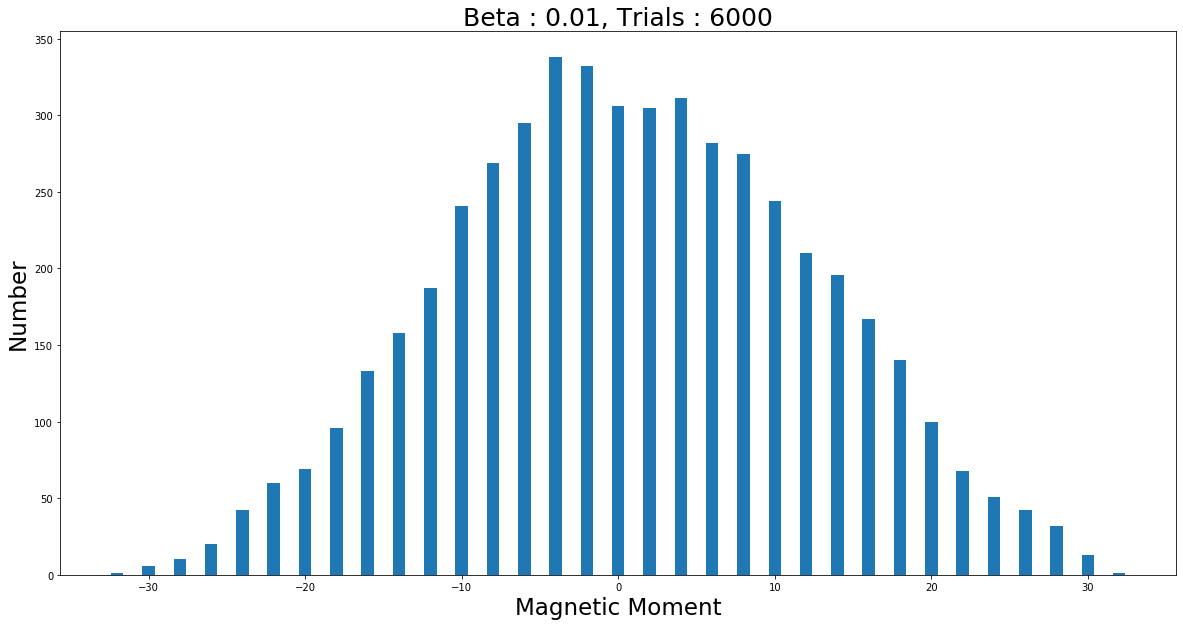

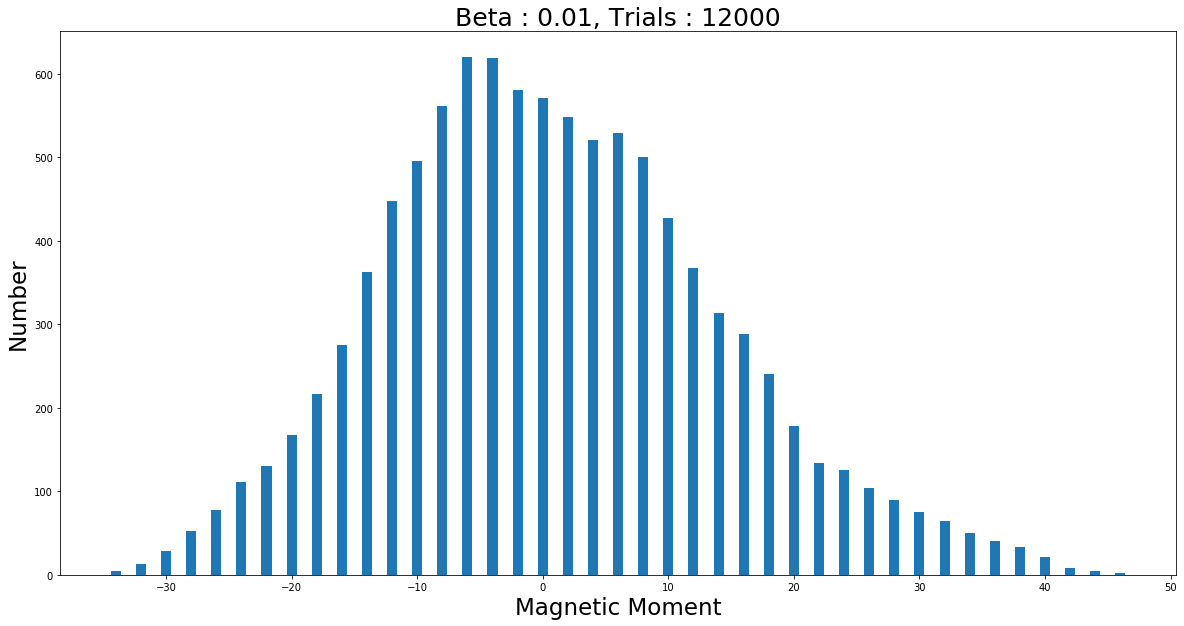

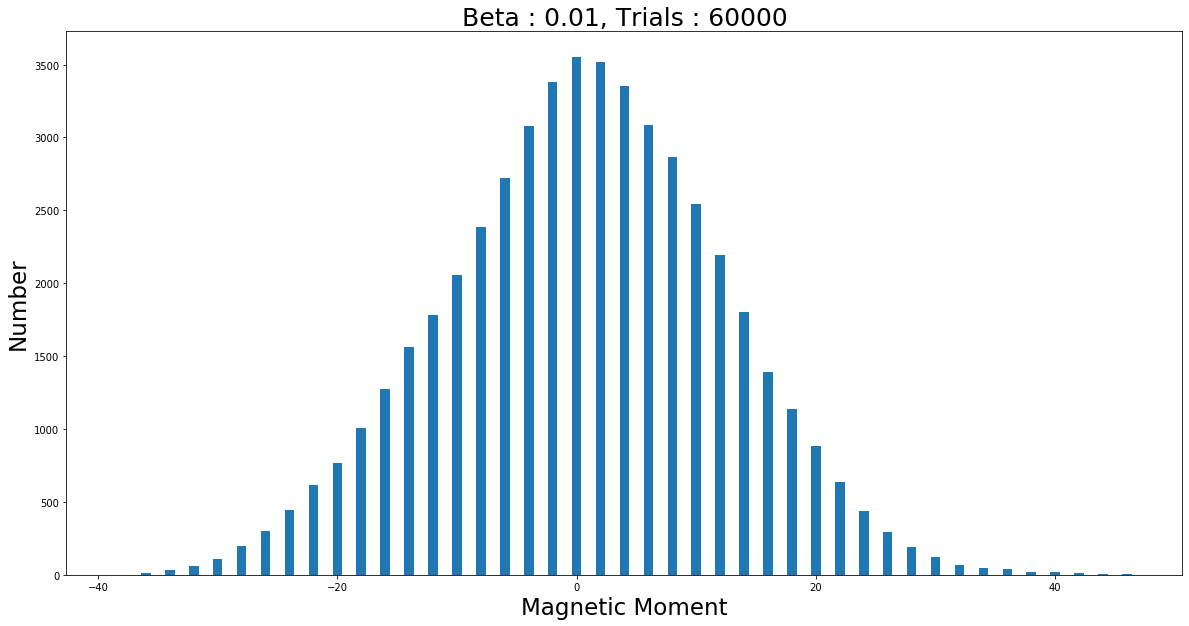

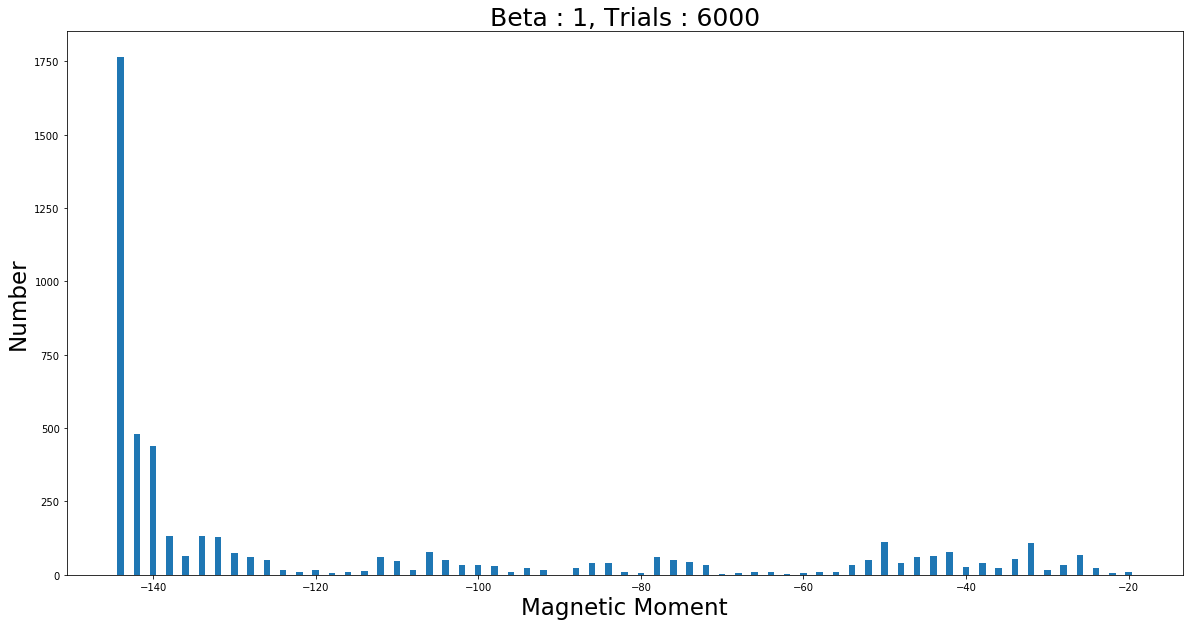

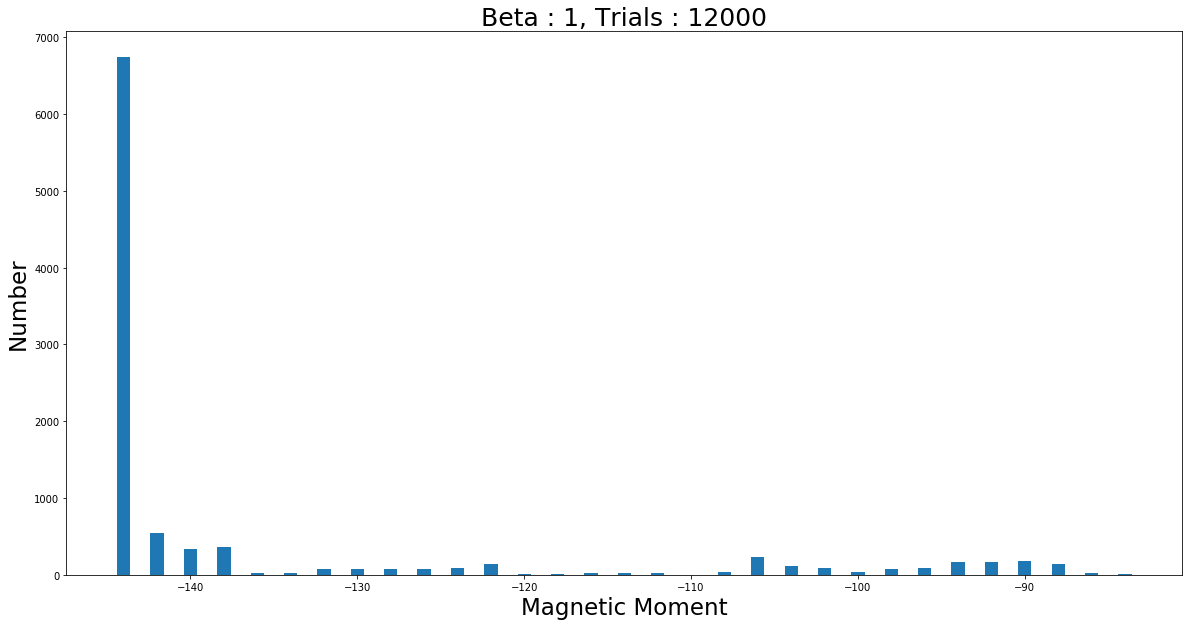

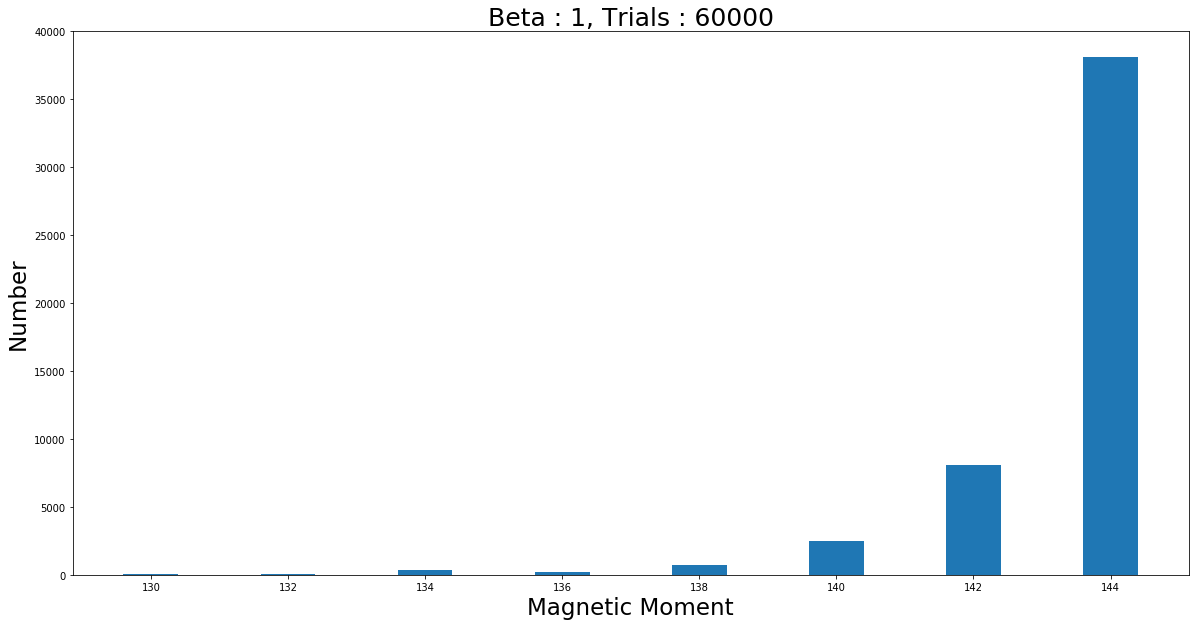

In [4]:
title_fontsize, label_fontsize, tick_fontsize = 25, 23, 13

for (beta, N) in M_logs:
    x, y = zip(*collections.Counter(M_logs[(beta, N)]).items())
    plt.figure(figsize=(20, 10))
    plt.bar(x, y)
    plt.title('Beta : {}, Trials : {}'.format(beta, N), fontsize=title_fontsize)
    plt.xlabel('Magnetic Moment', fontsize=label_fontsize)
    plt.ylabel('Number', fontsize=label_fontsize)
plt.show()